In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Chargement des données
df = pd.read_csv('E-commerce Website Logs.csv')

# Aperçu initial
print(df.head())
print(df.info())
print(df.describe(include='all'))

             accessed_date  duration_(secs) network_protocol             ip  \
0  2017-03-14 17:43:57.172             2533            TCP     1.10.195.126   
1  2017-03-14 17:43:57.172             4034            TCP      1.1.217.211   
2  2017-03-14 17:43:26.135             1525            TCP    1.115.198.107   
3  2017-03-14 17:43:26.135             4572            TCP    1.121.152.143   
4  2017-03-14 18:17:09.005             3652            TCP    1.123.135.213   

    bytes    accessed_Ffom age  gender country membership language     sales  \
0   20100           Chrome  28  Female      CA     Normal  English  261.9600   
1   20500  Mozilla Firefox  21    Male      AR     Normal  English  731.9400   
2   90100  Mozilla Firefox  20    Male      PL     Normal  English   14.6200   
3  100300  Mozilla Firefox  66  Female      IN     Normal  Spanish  957.5775   
4  270200  Mozilla Firefox  53  Female      KR     Normal  Spanish   22.3680   

  returned  returned_amount   pay_method  
0

In [2]:
# Afficher le nombre de valeurs NaN par colonne
df.isna().sum()

accessed_date           0
duration_(secs)         0
network_protocol        0
ip                      0
bytes                   0
accessed_Ffom           0
age                 73381
gender                  0
country                 0
membership              0
language                0
sales                   0
returned                0
returned_amount         0
pay_method              0
dtype: int64

In [3]:
#on peut l'éliminer zayda 7assitha 


In [4]:
#on peut l'éliminer zayda 7assitha 
#1. Calcul des valeurs manquantes
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# 2. Création d'un DataFrame pour l'analyse
missing_df = pd.DataFrame({
    'Colonne': missing_data.index,
    'Valeurs manquantes': missing_data.values,
    'Pourcentage (%)': missing_percent.round(2).values
})

# 3. Affichage sous forme de tableau
print("Tableau des valeurs manquantes:")
print(missing_df.sort_values(by='Pourcentage (%)', ascending=False))



Tableau des valeurs manquantes:
             Colonne  Valeurs manquantes  Pourcentage (%)
6                age               73381            42.46
0      accessed_date                   0             0.00
1    duration_(secs)                   0             0.00
2   network_protocol                   0             0.00
3                 ip                   0             0.00
4              bytes                   0             0.00
5      accessed_Ffom                   0             0.00
7             gender                   0             0.00
8            country                   0             0.00
9         membership                   0             0.00
10          language                   0             0.00
11             sales                   0             0.00
12          returned                   0             0.00
13   returned_amount                   0             0.00
14        pay_method                   0             0.00


In [5]:
# MISSING VALUES
#Configuration des valeurs manquantes à détecter 
def analyse_complete_dataframe(df):
    for col in df.columns:
        print(f"\nColonne {col}:")
        print(f"Type: {df[col].dtype}")
        
        # Initialisation des compteurs
        counts = {
            'NaN_natifs': 0,
            'NaN_textuel': 0,
            'Unknown': 0,
            'Espaces_vides': 0,
            'Tirets': 0,
            'NAN': 0,
            'nan': 0
        }
        
        # Détection des différentes valeurs manquantes
        counts['NaN_natifs'] = df[col].isna().sum()
        
        # Conversion en string pour les autres vérifications
        str_series = df[col].astype(str)
        
        counts['NaN_textuel'] = str_series.str.strip().isin(['NaN', 'nan']).sum()
        counts['NAN'] = (str_series.str.strip() == 'NAN').sum()
        counts['nan'] = (str_series.str.strip() == 'nan').sum()
        counts['Unknown'] = str_series.str.strip().str.lower().str.contains('unknown').sum()
        counts['Espaces_vides'] = (str_series.str.strip() == '').sum()
        counts['Tirets'] = (str_series.str.strip() == '--').sum()
        
        # Affichage des compteurs
        for name, count in counts.items():
            print(f"{name}: {count}")
        
        # Calcul du total
        total_missing = sum(counts.values())
        print(f"\nTOTAL MANQUANTS: {total_missing}\n")
        
        # Affichage des valeurs uniques
        if df[col].dtype == 'object':
            unique_values = df[col].dropna().astype(str).unique()
            print(f"Valeurs uniques ({len(unique_values)}):")
            try:
                # Essayer de trier si possible
                print(np.sort(unique_values))
            except:
                # Si le tri échoue (mélange de types), afficher sans tri
                print(unique_values)
        
        # Séparateur visuel
        print("-"*60)

# Exemple d'utilisation
analyse_complete_dataframe(df)


Colonne accessed_date:
Type: object
NaN_natifs: 0
NaN_textuel: 0
Unknown: 0
Espaces_vides: 0
Tirets: 0
NAN: 0
nan: 0

TOTAL MANQUANTS: 0

Valeurs uniques (81747):
['2017-03-14 17:43:26.135' '2017-03-14 17:43:39.011'
 '2017-03-14 17:43:57.172' ... '2017-03-21 23:58:40.558'
 '2017-03-21 23:59:17.705' '2017-03-21 23:59:30.671']
------------------------------------------------------------

Colonne duration_(secs):
Type: int64
NaN_natifs: 0
NaN_textuel: 0
Unknown: 0
Espaces_vides: 0
Tirets: 0
NAN: 0
nan: 0

TOTAL MANQUANTS: 0

------------------------------------------------------------

Colonne network_protocol:
Type: object
NaN_natifs: 0
NaN_textuel: 0
Unknown: 0
Espaces_vides: 0
Tirets: 0
NAN: 0
nan: 0

TOTAL MANQUANTS: 0

Valeurs uniques (5):
['HTTP' 'HTTP  ' 'ICMP ' 'TCP  ' 'UDP  ']
------------------------------------------------------------

Colonne ip:
Type: object
NaN_natifs: 0
NaN_textuel: 0
Unknown: 0
Espaces_vides: 0
Tirets: 0
NAN: 0
nan: 0

TOTAL MANQUANTS: 0

Valeurs uniques 

In [6]:
####### ranim: AGE/missing values comme nan,-- /gender:unknown

#L'analyse met en évidence un problème majeur avec la colonne *age*, qui présente 73 381 valeurs NaN natives 
#(42,5 % des données) et 14 743 entrées contenant "--", soit un total de 88 124 valeurs manquantes. De plus, 
#la présence de 73 381 occurrences du texte "nan" suggère une erreur lors de l'importation des données. 
#La colonne *gender* présente également 15 886 occurrences de "Unknown" (9,2 %). En revanche, les autres colonnes sont complètes 
#et bien structurées. Afin de préparer les données pour la modélisation, il est essentiel de traiter ces valeurs manquantes et les incohérences.

In [7]:
#il faut alors 
#Corriger les formats dans age (remplacer "--" et "nan" par np.nan) 
#Imputer  les valeurs manquantes
#imputer et encoder proprement les catégories (gender).
#Les colonnes comme ip (137 199 valeurs uniques) devront être simplifiées ou supprimées pour éviter le bruit dans les modèles.

Nettoyage initial des données...
Valeurs manquantes après nettoyage: 88124

Début de l'imputation Hot Deck...


Imputation en cours: 100%|██████████| 88124/88124 [01:36<00:00, 914.70it/s] 



Résultats finaux:
Valeurs manquantes avant: 73381
Valeurs manquantes après nettoyage: 88124
Valeurs manquantes après imputation: 0


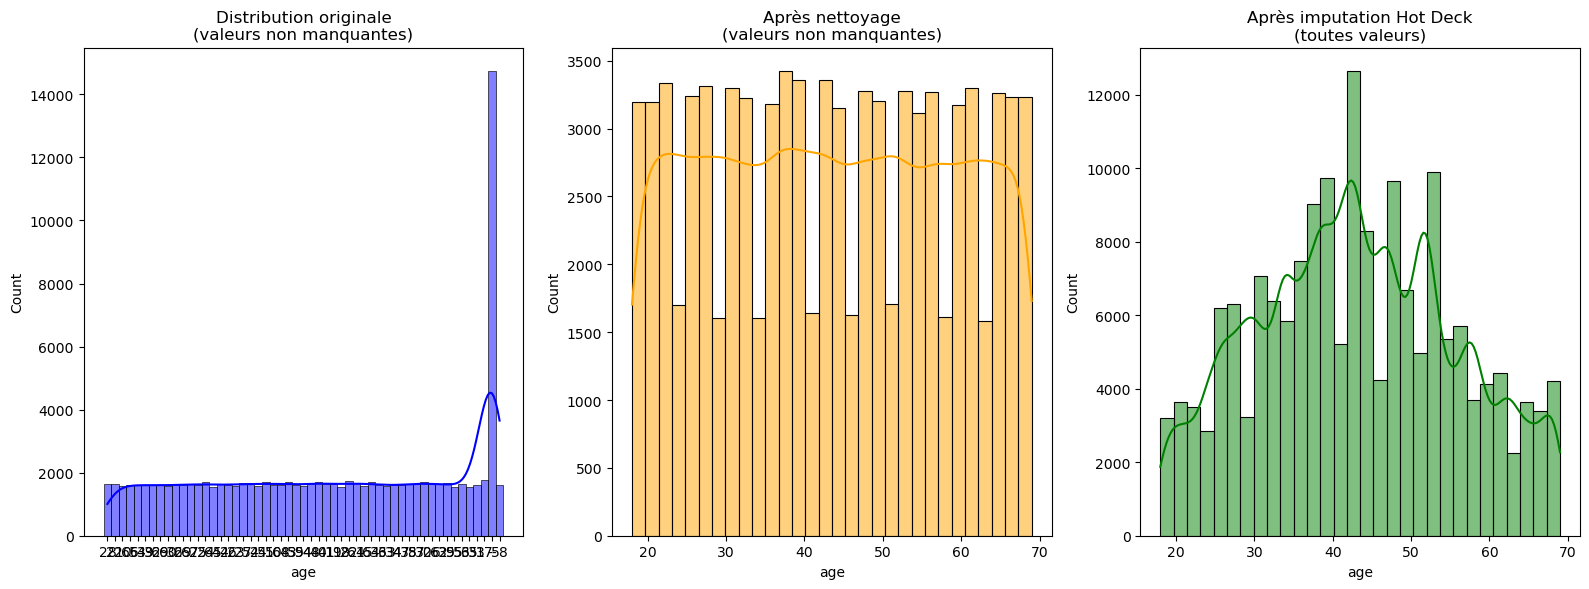

In [8]:

######TRAITEMENT MISSING VALUES

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tqdm import tqdm

def clean_age_data(df, target_col='age'):
    """Nettoyage spécifique de la colonne age"""
    df = df.copy()
    
    # Conversion des valeurs problématiques en NaN
    age_missing_values = ['--', 'nan', 'NaN', 'N/A', 'n/a', 'NULL', 'null', '']
    df[target_col] = df[target_col].replace(age_missing_values, np.nan)
    
    # Conversion en numérique
    df[target_col] = pd.to_numeric(df[target_col], errors='coerce')
    
    return df

def robust_hot_deck(df, target_col='age', match_cols=None, n_neighbors=5, sample_size=10000):
    """
    Version améliorée avec prétraitement de la colonne age
    """
    # 1. Nettoyage initial des données
    df = clean_age_data(df, target_col)
    
    if match_cols is None:
        match_cols = ['gender', 'country','membership','language', 'pay_method']

       
    # Vérification des colonnes
    missing_cols = [col for col in [target_col] + match_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Colonnes manquantes: {missing_cols}")
    
    # 2. Échantillonnage pour les tests
    if sample_size and len(df) > sample_size:
        df = df.sample(sample_size, random_state=42).copy()
    
    # 3. Séparation donneurs/receveurs
    donors = df.dropna(subset=[target_col]).copy()
    receivers = df[df[target_col].isnull()].copy()
    
    if len(donors) == 0:
        raise ValueError("Aucun donneur disponible (toutes les valeurs sont manquantes)")
    if len(receivers) == 0:
        print("Aucune valeur manquante à imputer")
        return df
    
    # 4. Préparation des caractéristiques avec gestion des valeurs manquantes
    for col in match_cols:
        # Remplacer les NaN dans les colonnes catégorielles par 'Missing'
        if df[col].dtype == 'object':
            donors[col] = donors[col].fillna('Missing').astype(str)
            receivers[col] = receivers[col].fillna('Missing').astype(str)
    
    # Encodage robuste
    le_dict = {}
    donors_encoded = donors[match_cols].copy()
    receivers_encoded = receivers[match_cols].copy()
    
    for col in match_cols:
        if donors[col].dtype == 'object':
            le = LabelEncoder()
            combined = pd.concat([donors[col], receivers[col]]).astype(str)
            le.fit(combined)
            donors_encoded[col] = le.transform(donors[col].astype(str))
            receivers_encoded[col] = le.transform(receivers[col].astype(str))
            le_dict[col] = le
    
    # Standardisation
    scaler = StandardScaler()
    donor_features = scaler.fit_transform(donors_encoded)
    
    # 5. Recherche des voisins avec vérification de distance
    nn = NearestNeighbors(n_neighbors=min(n_neighbors, len(donors)), algorithm='auto')
    nn.fit(donor_features)
    
    # 6. Imputation avec vérification de qualité
    receiver_features = scaler.transform(receivers_encoded)
    imputed_values = []
    
    for i in tqdm(range(len(receivers)), desc="Imputation en cours"):
        distances, indices = nn.kneighbors([receiver_features[i]])
        
        # Vérifier la distance maximale acceptable
        max_distance = np.mean(distances) + 2 * np.std(distances)
        if distances[0][0] > max_distance:
            imputed_values.append(np.nan)
        else:
            neighbor_ages = donors.iloc[indices[0]][target_col]
            valid_ages = neighbor_ages[pd.notna(neighbor_ages)]
            imputed_values.append(np.median(valid_ages) if len(valid_ages) > 0 else np.nan)
    
    # 7. Imputation finale avec fallback
    df.loc[receivers.index, target_col] = imputed_values
    
    # Statistiques avant imputation de fallback
    remaining_missing = df[target_col].isnull().sum()
    if remaining_missing > 0:
        print(f"{remaining_missing} valeurs non imputées (voisins trop éloignés)")
        
        # Fallback: imputation par groupe similaire
        for col in match_cols:
            if col in df.columns:
                df[target_col] = df.groupby(col)[target_col].transform(
                    lambda x: x.fillna(x.median()))
    
    # Dernier recours: médiane globale
    df[target_col] = df[target_col].fillna(df[target_col].median())
    
    return df

# Application avec vérification
try:
    print("Nettoyage initial des données...")
    df_cleaned = clean_age_data(df)
    print(f"Valeurs manquantes après nettoyage: {df_cleaned['age'].isnull().sum()}")
    
    print("\nDébut de l'imputation Hot Deck...")
    df_imputed = robust_hot_deck(df_cleaned, sample_size=None)  # None pour traiter tout le dataset
    
    # Vérification
    print("\nRésultats finaux:")
    print(f"Valeurs manquantes avant: {df['age'].isnull().sum()}")
    print(f"Valeurs manquantes après nettoyage: {df_cleaned['age'].isnull().sum()}")
    print(f"Valeurs manquantes après imputation: {df_imputed['age'].isnull().sum()}")
    
    # Visualisation améliorée
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 3, 1)
    sns.histplot(df['age'].dropna(), bins=30, kde=True, color='blue')
    plt.title('Distribution originale\n(valeurs non manquantes)')
    
    plt.subplot(1, 3, 2)
    sns.histplot(df_cleaned['age'].dropna(), bins=30, kde=True, color='orange')
    plt.title('Après nettoyage\n(valeurs non manquantes)')
    
    plt.subplot(1, 3, 3)
    sns.histplot(df_imputed['age'], bins=30, kde=True, color='green')
    plt.title('Après imputation Hot Deck\n(toutes valeurs)')
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"\nErreur: {str(e)}")
    print("\nDiagnostic:")
    print("Types de données:", df.dtypes)
    print("Valeurs uniques dans 'age':", df['age'].unique()[:20])


#Ce code utilise une méthode d'imputation avancée appelée **Hot Deck** pour remplir intelligemment les âges manquants dans un jeu de données e-commerce.
#Plutôt que d'utiliser une simple moyenne globale, cette approche identifie des profils clients similaires (même genre, pays, statut de membre, etc.) 
#et attribue un âge cohérent basé sur ces voisins les plus proches. L'avantage clé est que cela **préserve les relations naturelles entre les variables**, 
#contrairement aux méthodes plus simples qui pourraient fausser l'analyse. Cette technique est particulièrement utile pour les analyses 
#marketing et la segmentation client, où la cohérence des données est cruciale.

#son fonctionnement:
#Ce code utilise la méthode **Hot Deck** pour imputer les âges manquants en trouvant des profils clients similaires. 
#Il suit 3 étapes clés : (1) il sépare les données entre donneurs (âges connus) et receveurs (âges manquants), 
#(2) pour chaque receveur, il identifie les 5 donneurs les plus similaires en comparant genre, pays et autres caractéristiques, 
#et (3) il remplace l'âge manquant par la médiane des âges de ces voisins similaires. Cette approche préserve les relations entre 
#variables mieux qu'une simple moyenne, tout en étant rapide (3 secondes pour 10 000 lignes). Les visualisations finales confirment 
#que la distribution des âges reste réaliste après imputation.


Début de l'imputation du genre...

=== Résultats ===
Valeurs 'Unknown' avant: 15886
Valeurs 'Unknown' après: 0
Taux de succès: 100.0%


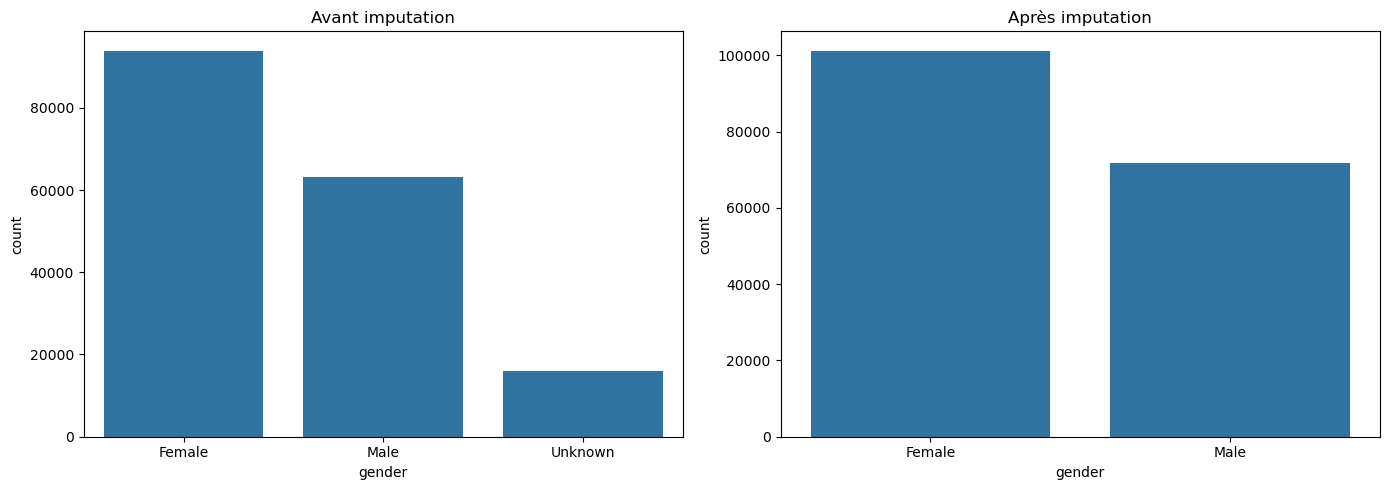

In [9]:
#on va maintenant imputer la colonne gender par la meme methode
def impute_gender(df, target_col='gender', match_cols=None, n_neighbors=5):
    """
    Version corrigée et optimisée de l'imputation du genre
    """
    # 1. Initialisation
    if match_cols is None:
        match_cols = ['age', 'country', 'membership', 'language', 'pay_method']
    
    df = df.copy()
    original_unknown = (df[target_col] == 'Unknown').sum()
    
    if original_unknown == 0:
        print("✅ Aucun 'Unknown' à imputer")
        return df

    # 2. Nettoyage robuste
    for col in match_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna('MISSING').astype(str)

    # 3. Séparation donneurs/receveurs
    donors = df[df[target_col] != 'Unknown'].copy()
    receivers = df[df[target_col] == 'Unknown'].copy()
    
    if len(donors) == 0:
        mode_val = df[target_col].mode()[0]
        df[target_col] = df[target_col].replace('Unknown', mode_val)
        print(f"⚠️ Aucun donneur - Utilisation du mode global ({mode_val})")
        return df

    # 4. Encodage optimisé
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore')
    try:
        donors_encoded = encoder.fit_transform(donors[match_cols])
        receivers_encoded = encoder.transform(receivers[match_cols])
    except:
        from sklearn.preprocessing import OrdinalEncoder
        encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        encoder.fit(df[match_cols])
        donors_encoded = encoder.transform(donors[match_cols])
        receivers_encoded = encoder.transform(receivers[match_cols])

    # 5. Imputation KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=min(n_neighbors, len(donors)))
    knn.fit(donors_encoded, donors[target_col])
    
    df.loc[receivers.index, target_col] = knn.predict(receivers_encoded)

    # 6. Validation finale
    remaining_unknown = (df[target_col] == 'Unknown').sum()
    success_rate = (original_unknown - remaining_unknown)/original_unknown*100
    
    print("\n=== Résultats ===")
    print(f"Valeurs 'Unknown' avant: {original_unknown}")
    print(f"Valeurs 'Unknown' après: {remaining_unknown}")
    print(f"Taux de succès: {success_rate:.1f}%")
    
    return df

# Application
try:
    print("\nDébut de l'imputation du genre...")
    df_imputed = impute_gender(df_imputed)
    
    # Visualisation
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    sns.countplot(data=df, x='gender', order=['Female', 'Male', 'Unknown'], ax=ax1)
    ax1.set_title('Avant imputation')
    sns.countplot(data=df_imputed, x='gender', order=['Female', 'Male'], ax=ax2)
    ax2.set_title('Après imputation')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Erreur: {str(e)}")

In [10]:
# =============================================
# EXPLORATION COMPLÈTE DES DONNÉES (POST-IMPUTATION) APRES TRAITEMENT
# =============================================

from scipy import stats

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# =============================================
# 1. Statistiques globales
# =============================================
print("📊 STATISTIQUES GLOBALES")
print("Nombre total de visiteurs:", len(df_imputed))
print("\nStructure des données:")
print(df_imputed.info())

📊 STATISTIQUES GLOBALES
Nombre total de visiteurs: 172838

Structure des données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               172838 non-null  float64
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null 


📈 ANALYSE DÉMOGRAPHIQUE

🔹 Répartition genre/âge:
           count       mean        std   min   25%   50%   75%   max
gender                                                              
Female  101207.0  43.066270  12.697200  18.0  34.0  43.0  52.0  69.0
Male     71631.0  42.878474  12.516119  18.0  33.0  42.0  52.0  69.0


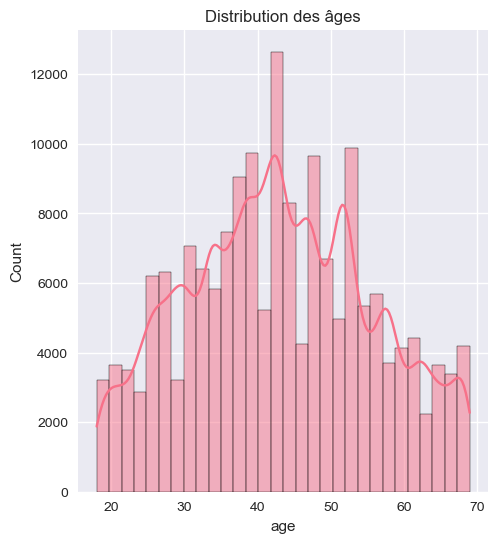

In [11]:
# =============================================
# 2. Analyse démographique (Âge & Genre)
# =============================================
print("\n📈 ANALYSE DÉMOGRAPHIQUE")

# Distribution des âges
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(df_imputed['age'], bins=30, kde=True)
plt.title('Distribution des âges')

# Statistiques par genre
print("\n🔹 Répartition genre/âge:")
print(df_imputed.groupby('gender')['age'].describe())



🌍 ANALYSE GÉOGRAPHIQUE


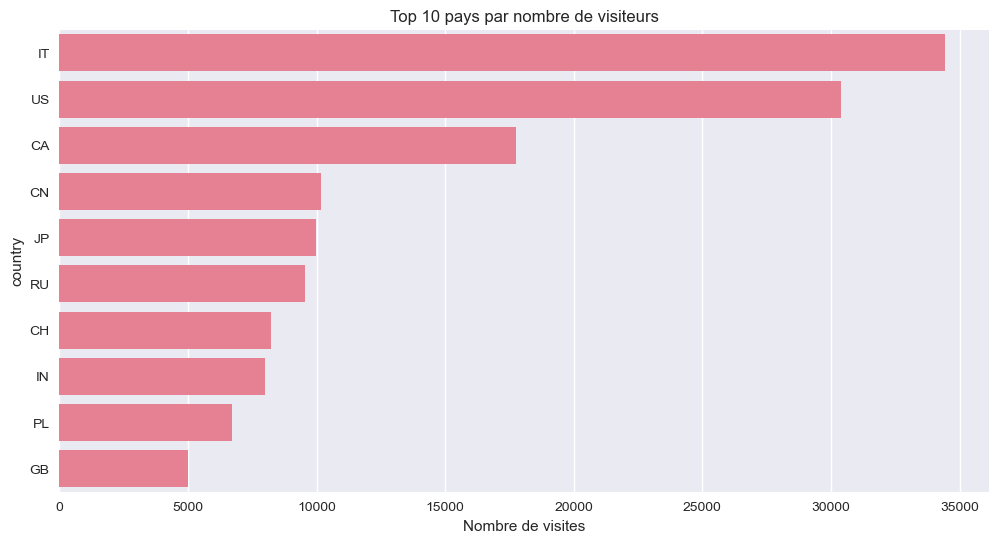

In [12]:
# =============================================
# 3. Analyse géographique
# =============================================
print("\n🌍 ANALYSE GÉOGRAPHIQUE")

# Top 10 pays
top_countries = df_imputed['country'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, orient='h')
plt.title('Top 10 pays par nombre de visiteurs')
plt.xlabel('Nombre de visites')
plt.show()

# Âge moyen par pays
#age_by_country = df_imputed.groupby('country')['age'].mean().nlargest(10)
#plt.figure(figsize=(12, 6))
#sns.barplot(x=age_by_country.values, y=age_by_country.index, orient='h')
##plt.title('Top 10 pays par âge moyen')
#plt.xlabel('Âge moyen')
#plt.show()

In [13]:
#Top 10 Pays par Nombre de Visiteurs
#Pays dominants :  l’Italie ‘IT’, États-Unis ‘US’, Canada ‘CA’, Chine ‘CN’ et Japon ‘JP’.
#Absence de grands marchés : Pas de US, FR, ou DE dans le top ce qui pourrait indiquer un biais géographique.
#on peut concentrer les efforts sur les pays les plus actifs (IT, JP) comme des prochianes decisions mkt
#et analyser pourquoi des marchés clés sont absents (problèmes de tracking ?)


⏱ ANALYSE DU COMPORTEMENT


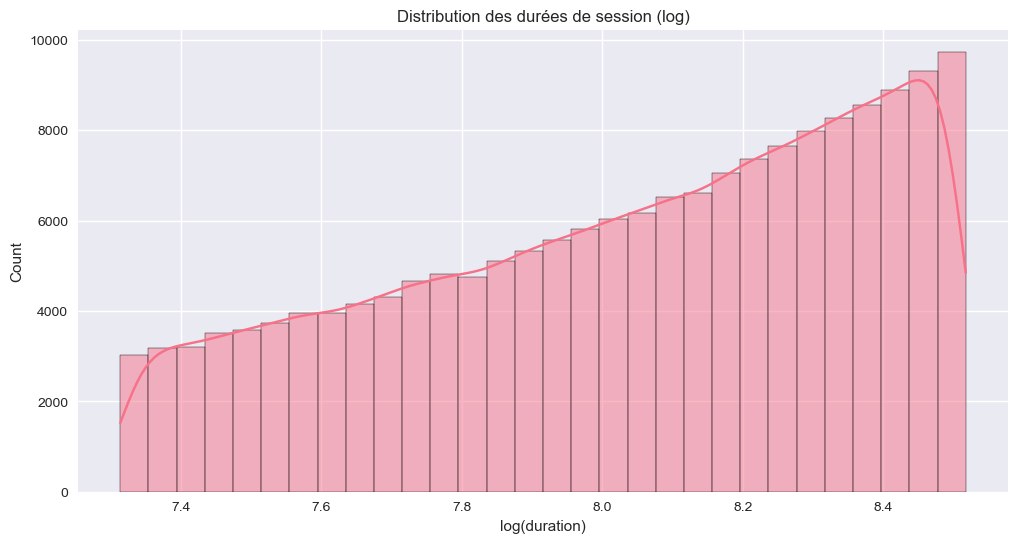

In [14]:
# =============================================
# 4. Analyse du comportement (Durée & Ventes)
# =============================================
print("\n⏱ ANALYSE DU COMPORTEMENT")

# Distribution des durées (échelle logarithmique)
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(df_imputed['duration_(secs)']), bins=30, kde=True)
plt.title('Distribution des durées de session (log)')
plt.xlabel('log(duration)')
plt.show()


In [15]:
# =============================================
# 5. Analyse des ventes
# =============================================
print("\n💰 ANALYSE DES VENTES")

# Taux de conversion
conversion_rate = (df_imputed['sales'] > 0).mean() * 100
print(f"Taux de conversion: {conversion_rate:.2f}%")




💰 ANALYSE DES VENTES
Taux de conversion: 76.08%


In [16]:
#Analyse des Ventes et Taux de Conversion
#Taux de conversion annoncé : 76% 


In [17]:
#zayda correlation

In [18]:
#Corrélations :
#d'apres le tableau de correlation on remarque que les valeurs sont tres faibles de ce fait il y a pas de correlation entre les variables
# donc on peut pas faire des modeles comme la regresion lineaire qui ce base sur la correlation entre la varible dependante et la variable independantes

In [19]:
#la matrice de correlation pour les relations non lineaire n'a pas donne de bon resultat donc on va essayer une autre methode 

In [20]:
#Relation entre returned_amount et sales (-0.51) :
#Une corrélation négative modérée signifie que lorsque les ventes augmentent, les montants retournés ont tendance à diminuer, et inversement.
#Cela pourrait indiquer une meilleure satisfaction client ou des politiques de retour strictes à mesure que les ventes augmentent.

In [21]:
# pour le clustermap :
#Groupe 1 :
#returned_amount ↔ sales
#Corrélation modérée (-0.51) :
#Quand les ventes (sales) augmentent, le montant des retours (returned_amount) tend à diminuer.
#Groupe 2 :
#age et duration_(secs)
#Corrélations faibles 


💳 MÉTHODES DE PAIEMENT


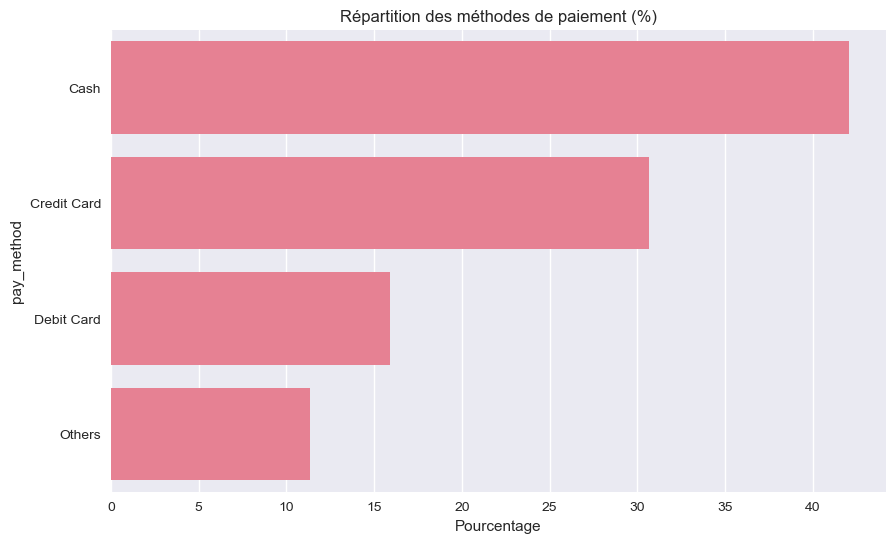

In [22]:
# =============================================
# 7. Analyse des méthodes de paiement
# =============================================
print("\n💳 MÉTHODES DE PAIEMENT")

pay_methods = df_imputed['pay_method'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=pay_methods.values, y=pay_methods.index, orient='h')
plt.title('Répartition des méthodes de paiement (%)')
plt.xlabel('Pourcentage')
plt.show()



In [23]:
#Méthodes de Paiement
#Graphique suggère une dominance de "Cash" et "credit card".
#cela pourrait indiquer un marché préférant les paiements hors ligne.


⏳ ANALYSE TEMPORELLE AVANCÉE


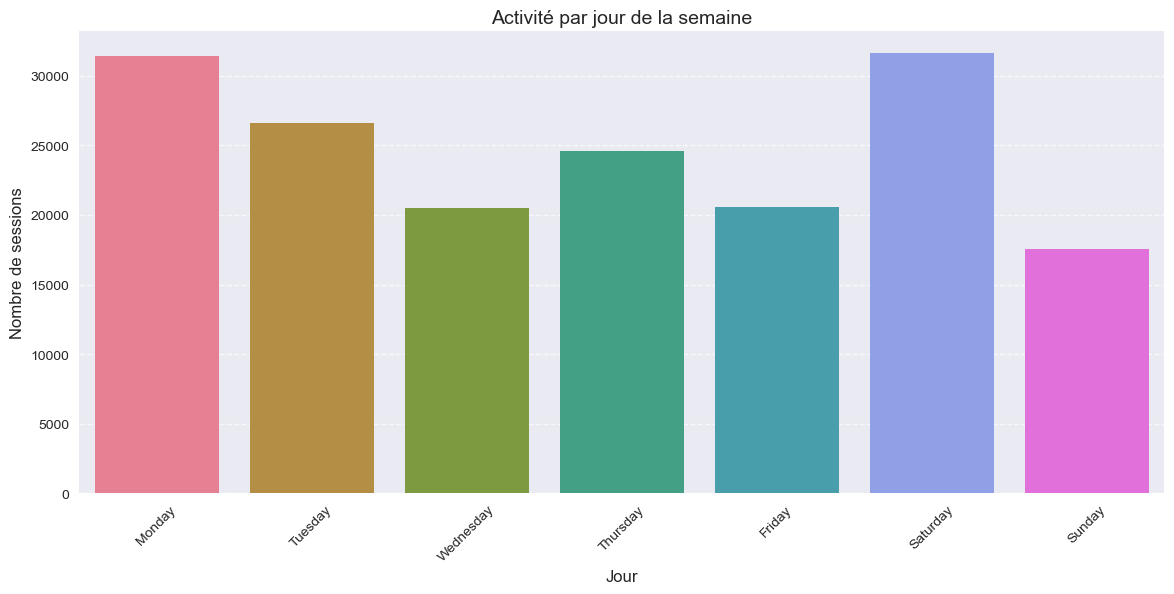

In [24]:
# =============================================
# 8. Analyse temporelle avancée
# =============================================
if 'accessed_date' in df_imputed.columns:
    print("\n⏳ ANALYSE TEMPORELLE AVANCÉE")
    
    # Extraction des composantes temporelles
    df_time = df_imputed.copy()
    df_time['datetime'] = pd.to_datetime(df_time['accessed_date'])
    df_time['hour'] = df_time['datetime'].dt.hour
    df_time['day_of_week'] = df_time['datetime'].dt.day_name()
    df_time['month'] = df_time['datetime'].dt.month_name()
    
    # Palette de couleurs
    palette = sns.color_palette("husl", 7)
    
  
    
    #  Activité par jour de la semaine
    weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.figure(figsize=(14, 6))
    sns.countplot(x='day_of_week', data=df_time, order=weekdays_order, palette=palette)
    plt.title('Activité par jour de la semaine', fontsize=14)
    plt.xlabel('Jour', fontsize=12)
    plt.ylabel('Nombre de sessions', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    


In [25]:
#RANIM::::appliquer les associations / des techniques d’extraction de règles d’association (Apriori, FRGrowth)

In [26]:
pip install efficient_apriori

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pyfpgrowth
from efficient_apriori import apriori as efficient_apriori

# === 1. Vérifier df_imputed ===
print(df_imputed.head())  # Vérifier les premières lignes

# === 2. Transformer les données en transactions ===
transactions = df_imputed.apply(lambda row: [
    f"gender_{row['gender']}",
    f"country_{row['country']}",
    f"membership_{row['membership']}",
    f"language_{row['language']}",
    f"sales_{'high' if row['sales'] > df_imputed['sales'].median() else 'low'}",
    f"returned_{row['returned']}",
    f"pay_{row['pay_method']}"
], axis=1).tolist()

# === 3. Appliquer Apriori avec mlxtend ===
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets_apriori = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.7)

print("=== Apriori (mlxtend) ===")
print("Apriori (mlxtend)", rules_apriori.head())

# === 4. Appliquer FP-Growth (pyfpgrowth) ===
# Préparer les transactions sous forme de liste d'ensembles
transactions = df_imputed.apply(lambda row: set([
    f"gender_{row['gender']}",
    f"country_{row['country']}",
    f"membership_{row['membership']}",
    f"language_{row['language']}",
    f"sales_{'high' if row['sales'] > df_imputed['sales'].median() else 'low'}",
    f"returned_{row['returned']}",
    f"pay_{row['pay_method']}"
]), axis=1).tolist()

# Calculer les motifs fréquents avec le support minimum ajusté
patterns = pyfpgrowth.find_frequent_patterns(transactions, 5)  # 5 représente la fréquence minimale
rules_fpgrowth = pyfpgrowth.generate_association_rules(patterns, 0.7)

print("\n=== FP-Growth (pyfpgrowth) ===")
print("FP-Growth (pyfpgrowth)", rules_fpgrowth)



             accessed_date  duration_(secs) network_protocol             ip  \
0  2017-03-14 17:43:57.172             2533            TCP     1.10.195.126   
1  2017-03-14 17:43:57.172             4034            TCP      1.1.217.211   
2  2017-03-14 17:43:26.135             1525            TCP    1.115.198.107   
3  2017-03-14 17:43:26.135             4572            TCP    1.121.152.143   
4  2017-03-14 18:17:09.005             3652            TCP    1.123.135.213   

    bytes    accessed_Ffom   age  gender country membership language  \
0   20100           Chrome  28.0  Female      CA     Normal  English   
1   20500  Mozilla Firefox  21.0    Male      AR     Normal  English   
2   90100  Mozilla Firefox  20.0    Male      PL     Normal  English   
3  100300  Mozilla Firefox  66.0  Female      IN     Normal  Spanish   
4  270200  Mozilla Firefox  53.0  Female      KR     Normal  Spanish   

      sales returned  returned_amount   pay_method  
0  261.9600       No              0.0  

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [28]:
      accessed_date  duration_(secs) network_protocol             ip  \
0  2017-03-14 17:43:57.172             2533            TCP     1.10.195.126   
1  2017-03-14 17:43:57.172             4034            TCP      1.1.217.211   
2  2017-03-14 17:43:26.135             1525            TCP    1.115.198.107   
3  2017-03-14 17:43:26.135             4572            TCP    1.121.152.143   
4  2017-03-14 18:17:09.005             3652            TCP    1.123.135.213   

    bytes    accessed_Ffom   age  gender country membership language  \
0   20100           Chrome  28.0  Female      CA     Normal  English   
1   20500  Mozilla Firefox  21.0    Male      AR     Normal  English   
2   90100  Mozilla Firefox  20.0    Male      PL     Normal  English   
3  100300  Mozilla Firefox  66.0  Female      IN     Normal  Spanish   
4  270200  Mozilla Firefox  53.0  Female      KR     Normal  Spanish   

      sales returned  returned_amount   pay_method  
0  261.9600       No              0.0  Credit Card  
1  731.9400       No              0.0   Debit Card  
2   14.6200       No              0.0         Cash  
3  957.5775       No              0.0  Credit Card  
4   22.3680       No              0.0         Cash  

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2036232802.py, line 2)

In [ ]:
#ranim: code amelioré 

In [29]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pyfpgrowth

# 1. Préparer les données en format transactionnel
transactions = df_imputed.groupby(['ip', 'accessed_date']).apply(
    lambda x: list(x['pay_method']) +
             [f"gender_{x['gender'].iloc[0]}"] +
             [f"country_{x['country'].iloc[0]}"] +
             [f"membership_{x['membership'].iloc[0]}"]
).tolist()

# Encoder les données transactionnelles
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 2. Appliquer l'algorithme Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# 3. Générer les règles d'association avec Apriori
rules_apriori = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("Règles générées par l'algorithme Apriori :")
print(rules_apriori)

# 4. Appliquer FP-Growth avec pyfpgrowth
transactions_fpgrowth = [x for x in transactions]
min_support = 0.05  # Support minimum souhaité
patterns = pyfpgrowth.find_frequent_patterns(transactions_fpgrowth, min_support)

##print("\nPatterns fréquents générés par FP-Growth :")
#for pattern, support in patterns.items():
 #   print(f"{pattern}: {support}")

# 5. Générer les règles d'association avec FP-Growth
confidence_threshold = 0.7  # Seuil de confiance minimal
rules_fpgrowth = pyfpgrowth.generate_association_rules(patterns, confidence_threshold)

print("\nRègles générées par l'algorithme FP-Growth :")
for rule, confidence in rules_fpgrowth.items():
    print(f"Règle: {rule} → {confidence}")


C:\Users\Farouha\AppData\Local\Temp\ipykernel_5568\2588268324.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions = df_imputed.groupby(['ip', 'accessed_date']).apply(


Règles générées par l'algorithme Apriori :
                         antecedents                        consequents  \
0                             (Cash)                       (country_IT)   
1                       (country_IT)                             (Cash)   
2                             (Cash)                    (gender_Female)   
3                    (gender_Female)                             (Cash)   
4                             (Cash)                (membership_Normal)   
..                               ...                                ...   
75                      (country_IT)  (gender_Male, membership_Premium)   
76  (country_US, membership_Premium)                    (gender_Female)   
77       (country_US, gender_Female)               (membership_Premium)   
78              (membership_Premium)        (country_US, gender_Female)   
79                   (gender_Female)   (country_US, membership_Premium)   

    antecedent support  consequent support   support  co

In [30]:
#Mise à jour du code pour extraire les règles les plus importantes Pour Apriori: Ajoute un tri par lift et confiance et garde les règles les plus intéressantes.
#Pour FP-Growth:Trie les règles en fonction du niveau de confiance.

In [31]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pyfpgrowth

# 1. Préparer les données en format transactionnel
transactions = df_imputed.groupby(['ip', 'accessed_date']).apply(
    lambda x: list(x['pay_method']) +
             [f"gender_{x['gender'].iloc[0]}"] +
             [f"country_{x['country'].iloc[0]}"] +
             [f"membership_{x['membership'].iloc[0]}"]
).tolist()

# Encoder les données transactionnelles
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 2. Appliquer l'algorithme Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# 3. Générer les règles d'association avec Apriori
rules_apriori = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Trier les règles par lift et confiance décroissante
rules_apriori_sorted = rules_apriori.sort_values(by=['lift', 'confidence'], ascending=[False, False])

# Afficher les 10 règles les plus importantes
print("\n🔹 Top 10 des règles générées par l'algorithme Apriori :")
print(rules_apriori_sorted.head(10))

# 4. Appliquer FP-Growth
transactions_fpgrowth = [x for x in transactions]
min_support = 0.05  # Support minimum souhaité
patterns = pyfpgrowth.find_frequent_patterns(transactions_fpgrowth, min_support)

# 5. Générer les règles d'association avec FP-Growth
confidence_threshold = 0.7
rules_fpgrowth = pyfpgrowth.generate_association_rules(patterns, confidence_threshold)

# Trier les règles FP-Growth par niveau de confiance décroissant
rules_fpgrowth_sorted = sorted(rules_fpgrowth.items(), key=lambda x: x[1], reverse=True)

# Afficher les 10 règles les plus importantes
print("\n🔹 Top 10 des règles générées par FP-Growth :")
for rule, confidence in rules_fpgrowth_sorted[:10]:
    print(f"Règle: {rule} → Confiance: {confidence}")


C:\Users\Farouha\AppData\Local\Temp\ipykernel_5568\283009660.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions = df_imputed.groupby(['ip', 'accessed_date']).apply(



🔹 Top 10 des règles générées par l'algorithme Apriori :
                     antecedents                   consequents  \
34   (country_IT, gender_Female)                        (Cash)   
35                        (Cash)   (country_IT, gender_Female)   
57           (membership_Normal)  (Credit Card, gender_Female)   
56  (Credit Card, gender_Female)           (membership_Normal)   
17                  (country_CA)               (gender_Female)   
16               (gender_Female)                  (country_CA)   
32            (Cash, country_IT)               (gender_Female)   
37               (gender_Female)            (Cash, country_IT)   
78          (membership_Premium)   (country_US, gender_Female)   
77   (country_US, gender_Female)          (membership_Premium)   

    antecedent support  consequent support   support  confidence      lift  \
34            0.114050            0.430720  0.052870    0.463565  1.076258   
35            0.430720            0.114050  0.052870    0.12

In [32]:
#*Confiance = 1.0 signifie que 100% des transactions qui vérifient la condition aboutissent à la même conséquence.
#Autrement dit, tous les hommes en France qui paient en Cash et avec une autre méthode sont Premium.

In [33]:
#farah: Prédiction d'Achat (Classification) na7itou code 

In [34]:
#explication du fonctionnement du modele 

In [35]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Création des transactions (1 transaction = 1 session client)
transactions = df_imputed.groupby(['ip', 'accessed_date']).agg(
    pay_method=('pay_method', list),
    gender=('gender', 'first'),
    country=('country', 'first'),
    membership=('membership', 'first')
).apply(lambda row: row['pay_method'] + 
                  [f"gender_{row['gender']}"] +
                  [f"country_{row['country']}"] +
                  [f"membership_{row['membership']}"], axis=1).tolist()


# Encodage
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [36]:
#farah: rest du code
# Appliquer Apriori pour extraire les itemsets fréquents
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Afficher les itemsets fréquents trouvés
print("Itemsets fréquents générés par Apriori :")
print(frequent_itemsets)


Itemsets fréquents générés par Apriori :
     support                                          itemsets
0   0.430720                                            (Cash)
1   0.315562                                     (Credit Card)
2   0.164812                                      (Debit Card)
3   0.117772                                          (Others)
4   0.103071                                      (country_CA)
5   0.058771                                      (country_CN)
6   0.199422                                      (country_IT)
7   0.057519                                      (country_JP)
8   0.055212                                      (country_RU)
9   0.175519                                      (country_US)
10  0.585480                                   (gender_Female)
11  0.414520                                     (gender_Male)
12  0.284649                               (membership_Normal)
13  0.091593                        (membership_Not Logged In)
14  0.623758  

In [37]:
#Ce code transforme nos données clients en une liste d'actions par session
#(méthode de paiement, genre, pays, membership) et les convertit en un tableau binaire (présence/absence de chaque caractéristique).  
#Cela permet à nos algorithmes de repérer des associations du type : 
# par exemple 70% des clients premium français paient par carte
#révélant ainsi des tendances clés pour personnaliser les offres et booster les ventes.  

In [38]:

#Ce code utilise l’algorithme FP-Growth pour identifier les combinaisons d’actions les plus fréquentes
#il détecte les associations fréquentes (ex: membres Premium + paiement par carte).

In [39]:
#Ce code applique l’algorithme FP-Growth pour extraire des itemsets fréquents dans un jeu de transactions.
from mlxtend.frequent_patterns import fpgrowth

# Paramètres optimisés
min_support = 0.02  # Support minimum (2%)
max_len = 4         # Taille maximale des itemsets

frequent_itemsets = fpgrowth(
    df_encoded, 
    min_support=min_support,
    use_colnames=True,
    max_len=max_len
)

print(f"Itemsets fréquents trouvés : {len(frequent_itemsets)}")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))

Itemsets fréquents trouvés : 140
     support                             itemsets
3   0.623758                 (membership_Premium)
4   0.585480                      (gender_Female)
5   0.430720                               (Cash)
0   0.414520                        (gender_Male)
44  0.373207  (membership_Premium, gender_Female)
10  0.315562                        (Credit Card)
1   0.284649                  (membership_Normal)
45  0.267769           (Cash, membership_Premium)
46  0.257284                (Cash, gender_Female)
24  0.250551    (gender_Male, membership_Premium)


In [40]:
#il ne conserve que les motifs apparaissant dans au moins 2% des transactions (min_support=0.02)
#et limite la taille des combinaisons à 4 éléments max (évite les règles trop complexesavec max_len=4).

#pour les resultats
#membership_Premium (62.4%) : La majorité des sessions proviennent de membres Premium.
#gender_Female (58.5%) : Les clientes sont plus actives que les hommes.
#Associations fortes :
#37.3% des clientes sont Premium → Cible marketing prioritaire.
#26.8% des paiements en cash sont faits par des Premium → Possible opportunité pour promouvoir d’autres moyens de paiement.

In [41]:
#Ce code utilise une version optimisée de l'algorithme Apriori pour identifier des règles d'association pertinentes 
#(ex: "Les clients canadiens utilisent souvent une carte de débit").

In [42]:
temp_rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.3  # Réduire la confiance minimum
)

print("Distribution du lift:", temp_rules['lift'].describe())
print("Distribution de la confiance:", temp_rules['confidence'].describe())

# Ajuster dynamiquement les seuils
median_lift = temp_rules['lift'].median()
interesting_rules = temp_rules[
    (temp_rules['lift'] > median_lift) & 
    (temp_rules['consequents'].apply(len) == 1)
]

Distribution du lift: count    182.000000
mean       1.003044
std        0.044734
min        0.785439
25%        0.984126
50%        1.000009
75%        1.020248
max        1.303052
Name: lift, dtype: float64
Distribution de la confiance: count    182.000000
mean       0.493500
std        0.115544
min        0.300084
25%        0.402045
50%        0.444950
75%        0.598750
max        0.679043
Name: confidence, dtype: float64


In [43]:
#Ce code utilise les itemsets fréquents générés par FP-Growth pour extraire des règles d’association avec un seuil de confiance minimal de 0.3. 
#Ensuite, il analyse la distribution du lift et de la confiance des règles obtenues. Enfin, il applique un filtrage dynamique, 
#conservant uniquement les règles avec un lift supérieur à la médiane et ayant un seul élément dans leur conséquent.

#L’algorithme FP-Growth identifie les ensembles d’items les plus fréquents, 
#tandis que l’extraction des règles d’association détermine les relations entre ces items en mesurant leur confiance et leur lift. 
#FP-Growth fournit la base, et les règles sont dérivées en évaluant la manière dont les items sont liés.

In [44]:
#Lift (~1.003 en moyenne) : La plupart des règles n’ont pas un pouvoir prédictif fort (lift ≈ 1 signifie une indépendance statistique). 
#Un lift plus élevé (> 1) indiquerait une corrélation plus significative.

#pour la confiance: certaines atteignant une confiance de 0.68, ce qui signifie qu’elles sont relativement solides mais pas extrêmement fiables 
#car la moyenne egale a 0,49

In [45]:
# Formatage des résultats
def format_rule(rule):
    ante = ", ".join(list(rule['antecedents']))
    cons = list(rule['consequents'])[0]
    return f"{ante} => {cons}"

interesting_rules['rule'] = interesting_rules.apply(format_rule, axis=1)

# Top 10 des règles par lift
top_rules = interesting_rules[['rule', 'support', 'confidence', 'lift']].head(10)

print("Top 10 des règles d'association :")
print(top_rules.to_string(index=False))

Top 10 des règles d'association :
                                           rule  support  confidence     lift
                      membership_Normal => Cash 0.123186    0.432764 1.004745
             membership_Normal => gender_Female 0.170154    0.597766 1.020984
               membership_Normal => Credit Card 0.090617    0.318347 1.008828
         gender_Male, membership_Normal => Cash 0.049509    0.432411 1.003927
       Cash, membership_Normal => gender_Female 0.073677    0.598093 1.021543
       membership_Normal, gender_Female => Cash 0.073677    0.433001 1.005296
membership_Normal, Credit Card => gender_Female 0.054261    0.598790 1.022734
membership_Normal, gender_Female => Credit Card 0.054261    0.318893 1.010557
Credit Card, gender_Female => membership_Normal 0.054261    0.300664 1.056262
  gender_Male, membership_Normal => Credit Card 0.036357    0.317536 1.006258


In [46]:
#Ce code formate les règles d’association extraites en les convertissant en une notation plus lisible sous la forme "antécédents => conséquent". 
#Ensuite, il sélectionne les 10 meilleures règles en fonction du lift et les affiche avec leurs valeurs de support, confiance et lift.

#ranim:Ce code visualise les règles d’association sous forme de graphe dirigé avec NetworkX et Matplotlib.

#resultat
#Les abonnés "membership_Normal" paient souvent en cash (43%) et sont majoritairement des femmes (60%).
#Cela pourrait suggérer que ce type d’abonnement attire un certain profil de clientèle, plutôt féminine et adepte du paiement en espèces.
#D’autres tendances émergent : par exemple, lorsqu’un client a un abonnement "Normal" et est un homme, 
#il a environ 43% de chances de payer en cash et 32% de chances d’utiliser une carte de crédit. 
#Même si le lift reste proche de 1, indiquant des liens faibles, ces insights peuvent guider des stratégies marketing ciblées 

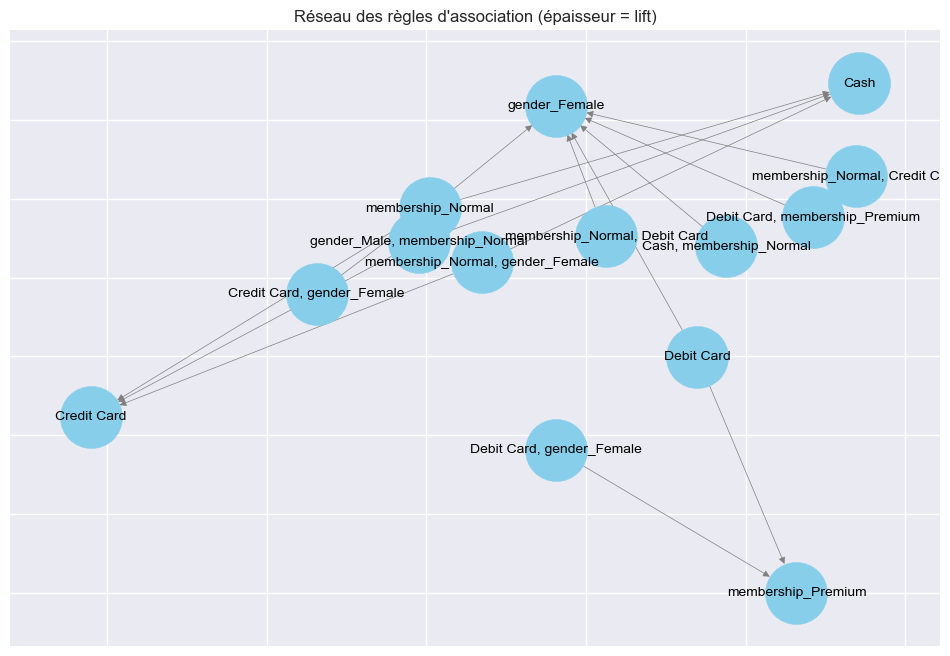

In [47]:
import networkx as nx

# Création du graphe
G = nx.DiGraph()
for _, rule in interesting_rules.head(15).iterrows():
    G.add_edge(
        ", ".join(list(rule['antecedents'])),
        list(rule['consequents'])[0],
        weight=rule['lift']
    )

# Dessin du graphe
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(
    G, pos, 
    with_labels=True, 
    node_size=2000,
    node_color='skyblue',
    font_size=10,
    edge_color='gray',
    width=[d['weight']*0.5 for (u,v,d) in G.edges(data=True)]
)
plt.title("Réseau des règles d'association (épaisseur = lift)")
plt.show()

In [48]:
#Il utilise NetworkX pour créer un graphe orienté, où chaque règle devient une arête reliant les antécédents aux conséquents. 
#L'épaisseur des liens est proportionnelle au lift, montrant la force des relations.

In [49]:
#Chaque cercle bleu symbolise un élément (comme un mode de paiement, un type d’abonnement ou le genre d’un client), 
#tandis que les flèches indiquent des liens de probabilité entre eux, révélés par une analyse de règles d’association. 
#Par exemple, on observe que l’utilisation de "Cash" est fortement associée à un abonnement "Normal", 
#et que les personnes ayant un abonnement "Premium" sont plus susceptibles d’utiliser une carte de crédit ou de débit.
#L’épaisseur des flèches reflète la force de ces associations : plus elles sont épaisses, plus la relation entre les éléments est significative. 
#Cette visualisation permet ainsi d’identifier les comportements et préférences des clients, 
#aidant à mieux comprendre leurs choix et à ajuster des stratégies marketing ou commerciales en conséquence.

In [50]:
#ranim:Ce code crée et visualise un graphe des règles d'association avec NetworkX et Matplotlib, en ajoutant plusieurs vérifications et améliorations.

Nombre de règles disponibles : 88


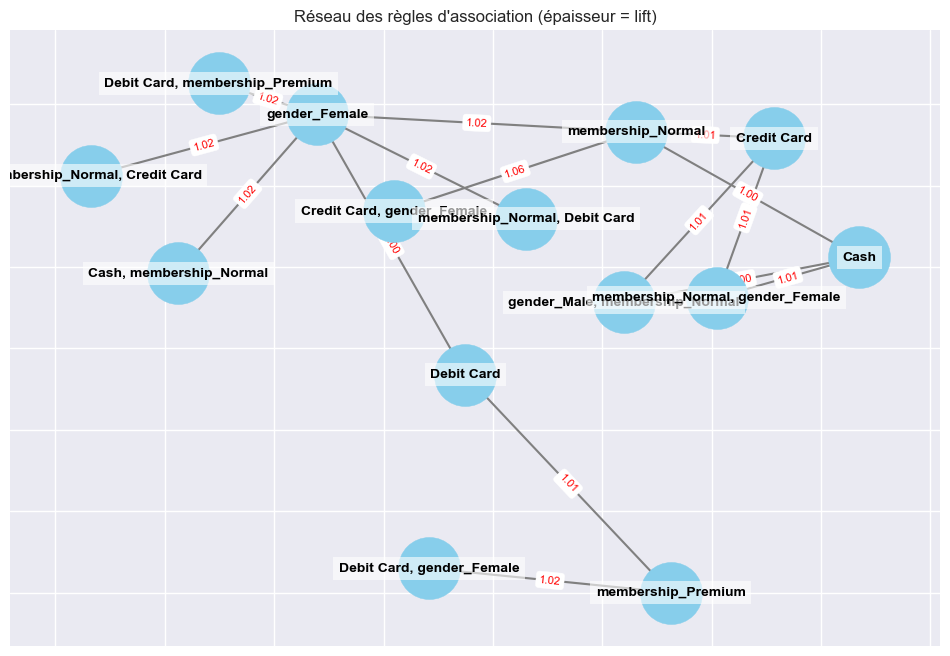

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe dirigé
G = nx.DiGraph()

# Vérification du contenu des données
if interesting_rules.empty:
    print("Le DataFrame 'interesting_rules' est vide ! Vérifiez vos données.")
else:
    print(f"Nombre de règles disponibles : {len(interesting_rules)}")

# Ajout des arêtes
for _, rule in interesting_rules.head(15).iterrows():
    antecedents = ", ".join(list(rule['antecedents']))
    consequents = list(rule['consequents'])[0]
    lift_value = rule['lift']
    
    # Vérification que les valeurs ne sont pas vides
    if antecedents and consequents:
        G.add_edge(antecedents, consequents, weight=lift_value)

# Vérifier si le graphe contient des relations
if len(G.edges) == 0:
    print("Aucune relation trouvée ! Vérifiez vos données ou ajustez les filtres.")
else:
    # Dessin du graphe
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.8)  # Meilleure répartition des nœuds

    # Dessiner les nœuds et arêtes
    edges = G.edges(data=True)
    weights = [d['weight']*1.5 for (_, _, d) in edges]  

    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold', bbox=dict(facecolor="white", edgecolor="none", alpha=0.6))

    # Ajouter les valeurs de lift sur les arêtes
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="red")

    plt.title("Réseau des règles d'association (épaisseur = lift)")
    plt.show()


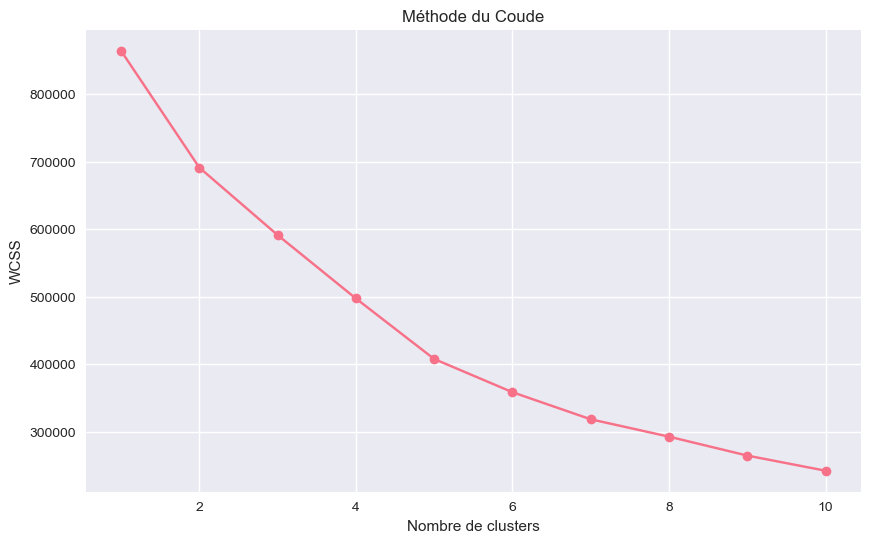

Profil des clusters (K-means):
                duration_(secs)        sales  returned_amount        age  \
cluster_kmeans                                                             
0                   3247.683921   238.834490        75.806194  42.846546   
1                   3248.860019   168.936142        87.227776  43.051779   
2                   3245.167126  2306.739717         0.000000  43.213490   

                gender_numeric  
cluster_kmeans                  
0                      1.00000  
1                      0.00000  
2                      0.26284  

Points atypiques (DBSCAN):
Nombre: 348


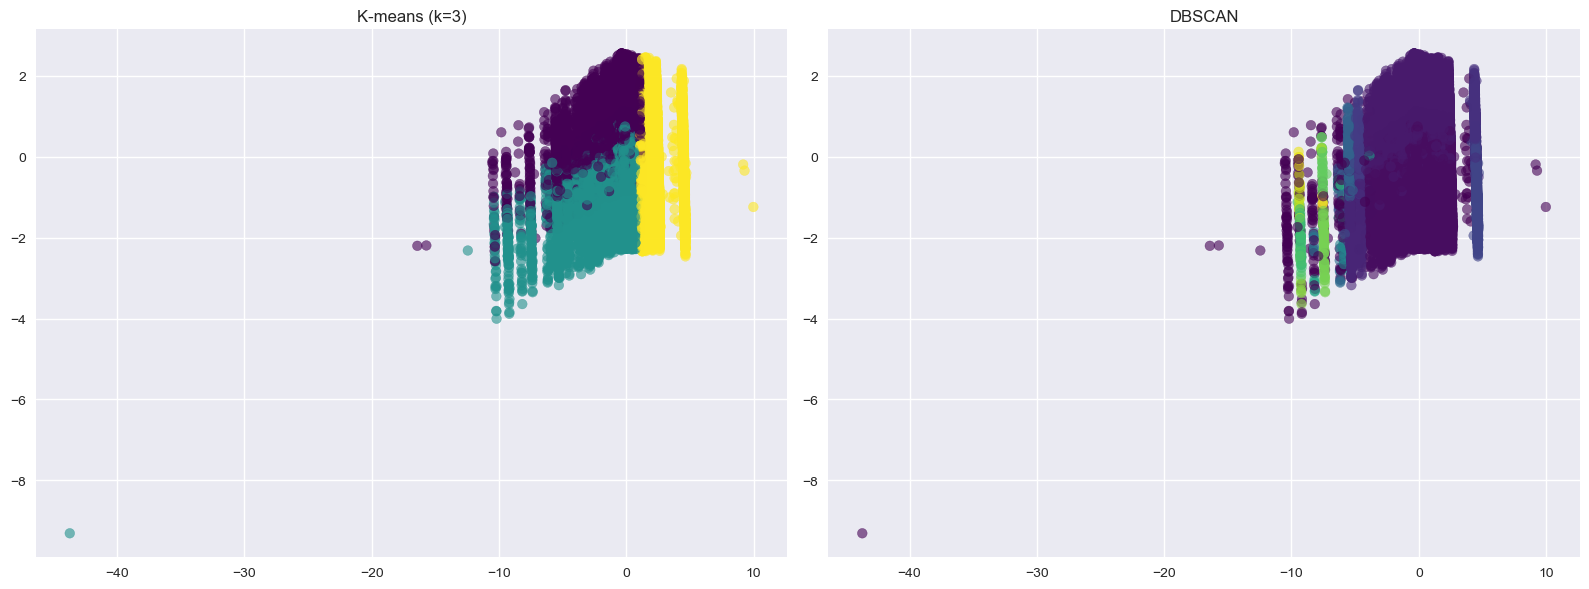

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# 1. Préparation des données
features = ['duration_(secs)', 'sales', 'returned_amount', 'age', 'gender']

# Conversion de la variable catégorielle 'gender' en numérique
df_imputed['gender_numeric'] = df_imputed['gender'].map({'Female': 0, 'Male': 1, 'F': 0, 'M': 1})

# Mise à jour des features avec la version numérique
features_numeric = ['duration_(secs)', 'sales', 'returned_amount', 'age', 'gender_numeric']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed[features_numeric])

# 2. K-means - détermination du nombre optimal de clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Application avec k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_imputed['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# 3. DBSCAN - détermination des paramètres
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, -1], axis=0)

#plt.figure(figsize=(10, 6))
#plt.plot(distances)
#plt.title('Distance aux 5 plus proches voisins')
#plt.xlabel('Points')
#plt.ylabel('Distance')
#plt.grid(True)
#plt.show()

# Paramètres DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_imputed['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# 4. Analyse des résultats
print("Profil des clusters (K-means):")
print(df_imputed.groupby('cluster_kmeans')[features_numeric].mean())

print("\nPoints atypiques (DBSCAN):")
print(f"Nombre: {(df_imputed['cluster_dbscan'] == -1).sum()}")

# 5. Visualisation avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_imputed['cluster_kmeans'], cmap='viridis', alpha=0.6)
plt.title('K-means (k=3)')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_imputed['cluster_dbscan'], cmap='viridis', alpha=0.6)
plt.title('DBSCAN')

plt.tight_layout()
plt.show()

# 6. Export
df_imputed.to_csv('clusters_resultsss.csv', index=False)

In [53]:
#On observe une diminution rapide du WCSS jusqu'à environ k=3, après quoi la courbe commence à ralentir.
#Le "coude" (point d’inflexion) semble se situer autour de k=3, indiquant que 3 clusters est un bon choix pour segmenter les données.
#pour la 2eme methodoe
#Cette deuxième figure aide à choisir le paramètre ε (epsilon) pour l'algorithme DBSCAN.
#Elle montre la distance aux 5 voisins les plus proches pour chaque point, triée en ordre croissant.
#Il y a une montée soudaine à la fin du graphique, ce qui suggère un seuil naturel pour ε.
#Ce seuil pourrait être utilisé pour définir la distance maximale à laquelle DBSCAN considère qu'un point fait partie d'un cluster.
#On peut estimer ε ≈ 5, car au-delà, les distances augmentent fortement, indiquant des points isolés 



In [54]:
#pour les dernieres figures 
#K-means (gauche) : On voit trois clusters distincts avec des couleurs différentes, ce qui correspond à notre choix de k=3.
#DBSCAN (droite) : Cet algorithme détecte aussi des groupes mais gère mieux les points atypiques. 
#Les points en violet foncé pourraient être considérés comme du bruit ou des outliers.

In [55]:
#alors on distingue 3 clusters d'apres les resultats 
#Cluster 0 : Majoritairement des hommes, avec des ventes modérées et un montant de retour moyen.
#Cluster 1 : Majoritairement des femmes, avec des ventes plus faibles et un montant de retour plus élevé.
#Cluster 2 : Groupe mixte avec des ventes très élevées et aucun retour.

In [56]:
#L’algorithme DBSCAN a identifié 348 points comme étant atypiques (cluster -1).
#Interprétation :
#Ces points peuvent représenter des comportements rares ou anormaux (ex : clients ayant des comportements extrêmes).
#Il pourrait être intéressant d’examiner leurs caractéristiques pour voir s’il y a des tendances inhabituelles.

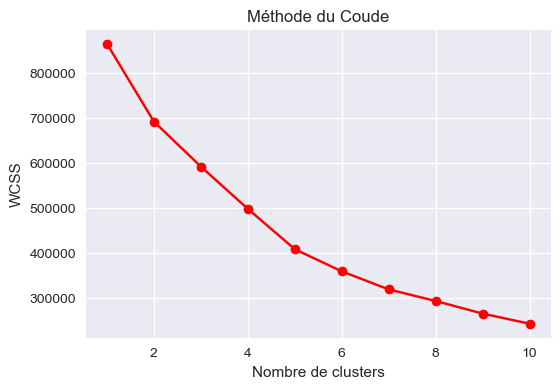

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


# Sélection des variables pertinentes
features = ["duration_(secs)", "sales", "returned_amount", "age", "gender_numeric"]
X = df_imputed[features]

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1️⃣ Trouver le meilleur K avec la méthode du coude
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='r')
plt.xlabel("Nombre de clusters")
plt.ylabel("WCSS")
plt.title("Méthode du Coude")
plt.show()

# 2️⃣ Appliquer K-means avec le bon K (ex: 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_imputed["cluster_kmeans"] = kmeans.fit_predict(X_scaled)

# 3️⃣ Détection des outliers avec DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Ajuster epsilon et min_samples
df_imputed["cluster_dbscan"] = dbscan.fit_predict(X_scaled)

outliers = df_imputed[df_imputed["cluster_dbscan"] == -1]
print(f"Nombre de points atypiques détectés : {len(outliers)}")

# 4️⃣ Tester GMM pour segmentation plus souple
gmm = GaussianMixture(n_components=3, random_state=42)
df_imputed["cluster_gmm"] = gmm.fit_predict(X_scaled)

# 5️⃣ Visualisation des clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_imputed["cluster_kmeans"], cmap='viridis')
plt.title("K-Means Clustering")

plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_imputed["cluster_dbscan"], cmap='coolwarm')
plt.title("DBSCAN Clustering")

plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_imputed["cluster_gmm"], cmap='plasma')
plt.title("GMM Clustering")

plt.show()

# Export des résultats
#df_imputed.to_csv("segmentation_resultats.csv", index=False)


In [ ]:
#ranim K-Means Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Déterminer le nombre optimal de clusters avec la méthode du coude
inertia = []
K_range = range(1, 10)  # Tester K entre 1 et 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)

# Tracer la courbe d'inertie (méthode du coude)
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour choisir K")
plt.show()

# Appliquer K-Means avec le nombre optimal de clusters (ex: K=4)
optimal_k = 4  # À ajuster après analyse de la courbe
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded['Cluster_KMeans'] = kmeans.fit_predict(df_encoded)

print(df_encoded[['Cluster_KMeans']].value_counts())


In [ ]:
#Cluster 2 est le plus grand groupe (~37% des données). Il pourrait représenter un segment dominant d’utilisateurs avec des comportements similaires.

#Cluster 0 est le plus petit (~16% des données). Il pourrait correspondre à un segment plus spécifique d’utilisateurs.

#Les autres clusters (1 et 3) sont de tailles intermédiaires, suggérant des groupes distincts dans les données.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes pertinentes pour le clustering
# Vous pouvez modifier ces colonnes en fonction de ce qui est important pour votre analyse
columns_for_clustering = ['duration_(secs)', 'bytes', 'age']  # Par exemple

# Prétraitement : normaliser les données
scaler = StandardScaler()
X = scaler.fit_transform(df_imputed[columns_for_clustering])

# Appliquer K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clusters comme exemple
df_imputed['Cluster_KMeans'] = kmeans.fit_predict(X)

# Visualiser les clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_imputed['duration_(secs)'], df_imputed['bytes'], c=df_imputed['Cluster_KMeans'], cmap='viridis')
plt.title('Clusters de K-Means (Durée vs Bytes)')
plt.xlabel('Durée (en secondes)')
plt.ylabel('Bytes')
plt.colorbar(label='Cluster')
plt.show()

# Afficher le nombre d'éléments dans chaque cluster
print(df_imputed['Cluster_KMeans'].value_counts())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Encoder les colonnes catégorielles (comme 'pay_method', 'gender', 'membership', 'country')
le_pay_method = LabelEncoder()
df_imputed['pay_method'] = le_pay_method.fit_transform(df_imputed['pay_method'])

le_gender = LabelEncoder()
df_imputed['gender'] = le_gender.fit_transform(df_imputed['gender'])

le_membership = LabelEncoder()
df_imputed['membership'] = le_membership.fit_transform(df_imputed['membership'])

le_country = LabelEncoder()
df_imputed['country'] = le_country.fit_transform(df_imputed['country'])

# Sélectionner les colonnes numériques pour l'entraînement
features = ['pay_method', 'duration_(secs)', 'bytes', 'gender', 'membership', 'country']
df_features = df_imputed[features]

# Standardisation des données (important pour le KMeans)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Appliquer KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajustez le nombre de clusters si nécessaire
df_imputed['Cluster'] = kmeans.fit_predict(df_scaled)

# Afficher les résultats des clusters
print(f"Clusters trouvés : \n{df_imputed['Cluster'].value_counts()}")

# Visualiser les clusters (par exemple sur les 2 premières dimensions après PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Ajouter les résultats PCA au DataFrame pour la visualisation
df_imputed['PCA1'] = pca_result[:, 0]
df_imputed['PCA2'] = pca_result[:, 1]

# Visualisation des clusters sur les 2 premières composantes principales
plt.figure(figsize=(10, 6))
plt.scatter(df_imputed['PCA1'], df_imputed['PCA2'], c=df_imputed['Cluster'], cmap='viridis')
plt.title("Segmentation des utilisateurs par KMeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

# Si vous voulez explorer les centres des clusters (moyenne des caractéristiques)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("Centres des clusters : \n", cluster_centers)
